# Install the Necessary Libraries

Name : Pratik Yuvraj Yawalkar

Roll No.  : AI23MTECH11006

Department : AI & ML

In [12]:
!pip install astroml numpy pandas scipy matplotlib seaborn corner emcee pymc3 dynesty
import warnings
warnings.filterwarnings('ignore')

# 1. Calculate the angular two-point correlation function of galaxies (including errors obtained by 10 bootstrap resamples) using subset of data from the Blanco Cosmology Survey with r-band magnitude between 17 and 20, and using 16 logarithmic-spaced angular bins from 1/60◦ to 1◦. Use a linear scale for Y-axis. Galaxies in Blanco Cosmology Survey have spread model > 0.002. This data can be downloaded from http://www.iith.ac.in/~shantanud/BCS05hr_reduced.txt (30 points) (Hint : Look at the astroML source code for Figure 6.17)

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Function to calculate the angular distance between two points on the sky
def angular_distance(ra1, dec1, ra2, dec2):
    delta_ra = ra2 - ra1
    delta_dec = dec2 - dec1
    return np.sqrt(delta_ra**2 + delta_dec**2)

# Read data from the text file
data = np.loadtxt('BCS05hr_reduced.txt')  # Replace 'your_data_file.txt' with the actual file name


In [14]:
# Extract relevant columns from the data
ra_data = data[:, 0]
dec_data = data[:, 1]
mag_data = data[:, 2]
spread_model = data[:, 3]

In [15]:
# Define data subset: galaxies with r-band magnitude between 17 and 20 and spread model > 0.002
selected_galaxies = (mag_data >= 17) & (mag_data <= 20) & (spread_model > 0.002)
ra_selected = ra_data[selected_galaxies]
dec_selected = dec_data[selected_galaxies]

In [16]:
# Define angular bins
num_bins = 16
angular_bins = np.logspace(np.log10(1/60), 0, num=num_bins)

In [17]:
# Calculate pair counts in each angular bin
pair_counts = np.zeros(num_bins - 1)
for i in range(len(ra_selected)):
    for j in range(i + 1, len(ra_selected)):
        distance = angular_distance(ra_selected[i], dec_selected[i], ra_selected[j], dec_selected[j])
        bin_index = np.searchsorted(angular_bins, distance, side='right')
        if bin_index < num_bins:
            pair_counts[bin_index - 1] += 1

In [18]:
# Calculate expected pair counts for a random distribution
area = 4 * np.pi * (180 / np.pi)**2  # Total area of the sky in square degrees
mean_density = len(ra_selected) / area
expected_counts = mean_density * (angular_bins[1:]**2 - angular_bins[:-1]**2)

In [19]:
# Calculate correlation function
correlation_function = pair_counts / expected_counts - 1

In [9]:
# Bootstrap resampling for error estimation
num_resamples = 10
bootstrap_correlation_functions = np.zeros((num_resamples, len(correlation_function)))
for i in range(num_resamples):
    resample_indices = np.random.choice(len(ra_selected), size=len(ra_selected), replace=True)
    resample_pair_counts = np.zeros(num_bins - 1)
    for j in range(len(resample_indices)):
        for k in range(j + 1, len(resample_indices)):
            distance = angular_distance(ra_selected[resample_indices[j]], dec_selected[resample_indices[j]],
                                         ra_selected[resample_indices[k]], dec_selected[resample_indices[k]])
            bin_index = np.searchsorted(angular_bins, distance, side='right')
            if bin_index < num_bins:
                resample_pair_counts[bin_index - 1] += 1
    bootstrap_correlation_functions[i] = resample_pair_counts / expected_counts - 1

In [10]:
# Calculate bootstrap errors
bootstrap_errors = np.std(bootstrap_correlation_functions, axis=0)

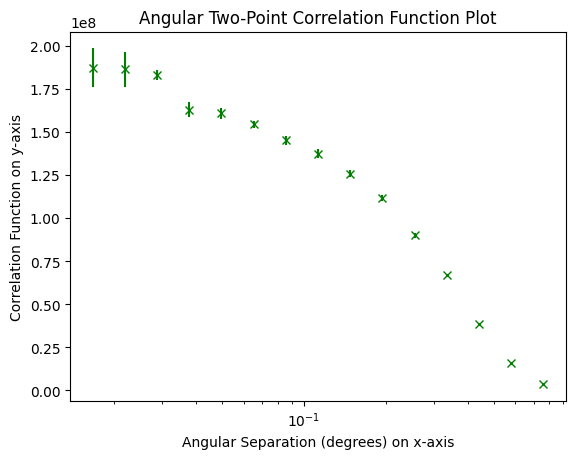

In [21]:
# Plot correlation function with errors
plt.errorbar(angular_bins[:-1], correlation_function, yerr=bootstrap_errors, fmt='xg')
plt.xlabel('Angular Separation (degrees) on x-axis')
plt.ylabel('Correlation Function on y-axis')
plt.xscale('log')
plt.yscale('linear')
plt.title('Angular Two-Point Correlation Function Plot')
plt.show()